# **Body Fat Prediction**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('/content/bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# Understanding the Data

In [3]:
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [4]:
df.shape

(252, 15)

In [5]:
df.size

3780

In [6]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [9]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [10]:
df.nunique()

Density    218
BodyFat    176
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
dtype: int64

In [11]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

# Exploratory Data Analysis

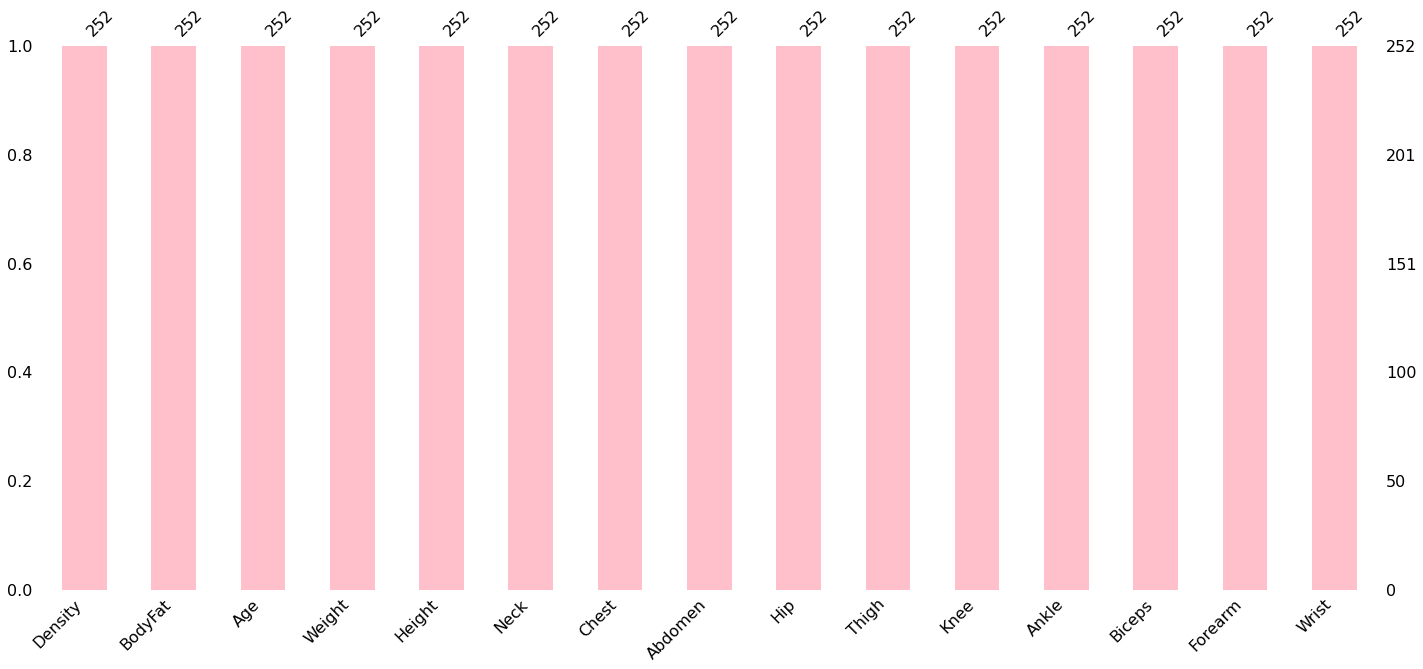

In [12]:
import missingno as no
no.bar(df, color='pink')

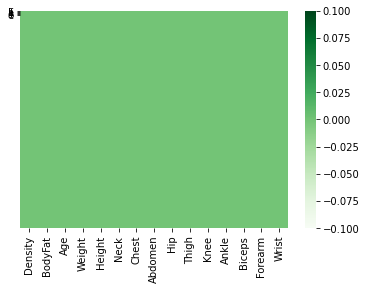

In [13]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

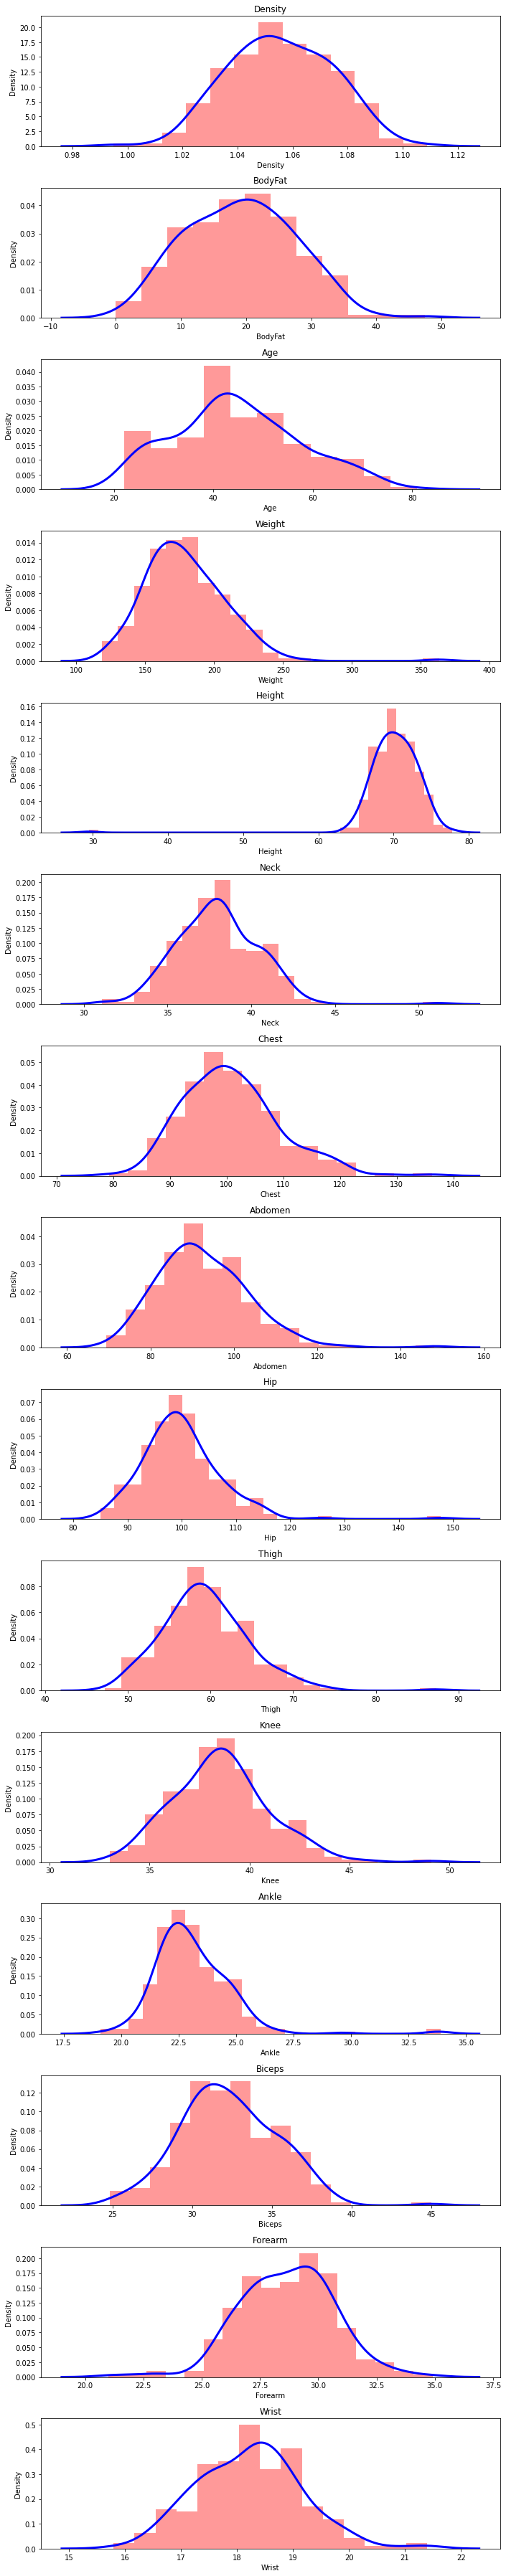

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(15, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
  plt.title(df.columns[i])
  
plt.tight_layout()

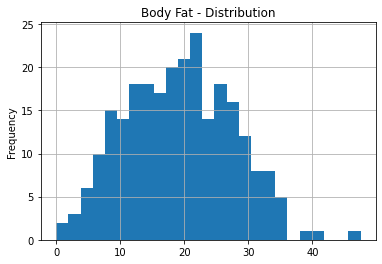

In [20]:
df.BodyFat.plot(kind='hist', bins=25)
plt.title('Body Fat - Distribution')
plt.grid()
plt.show()

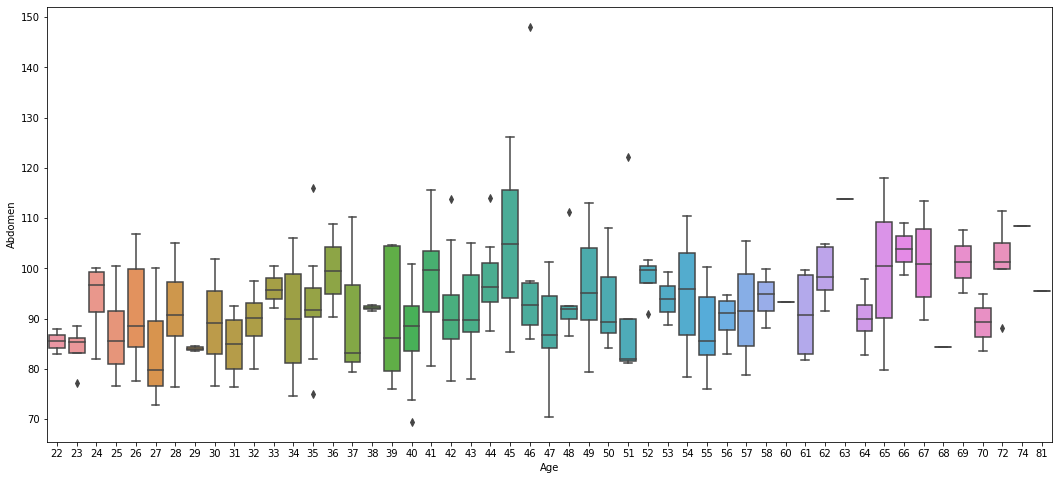

In [27]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Age',y='Abdomen',data=df)
plt.show()

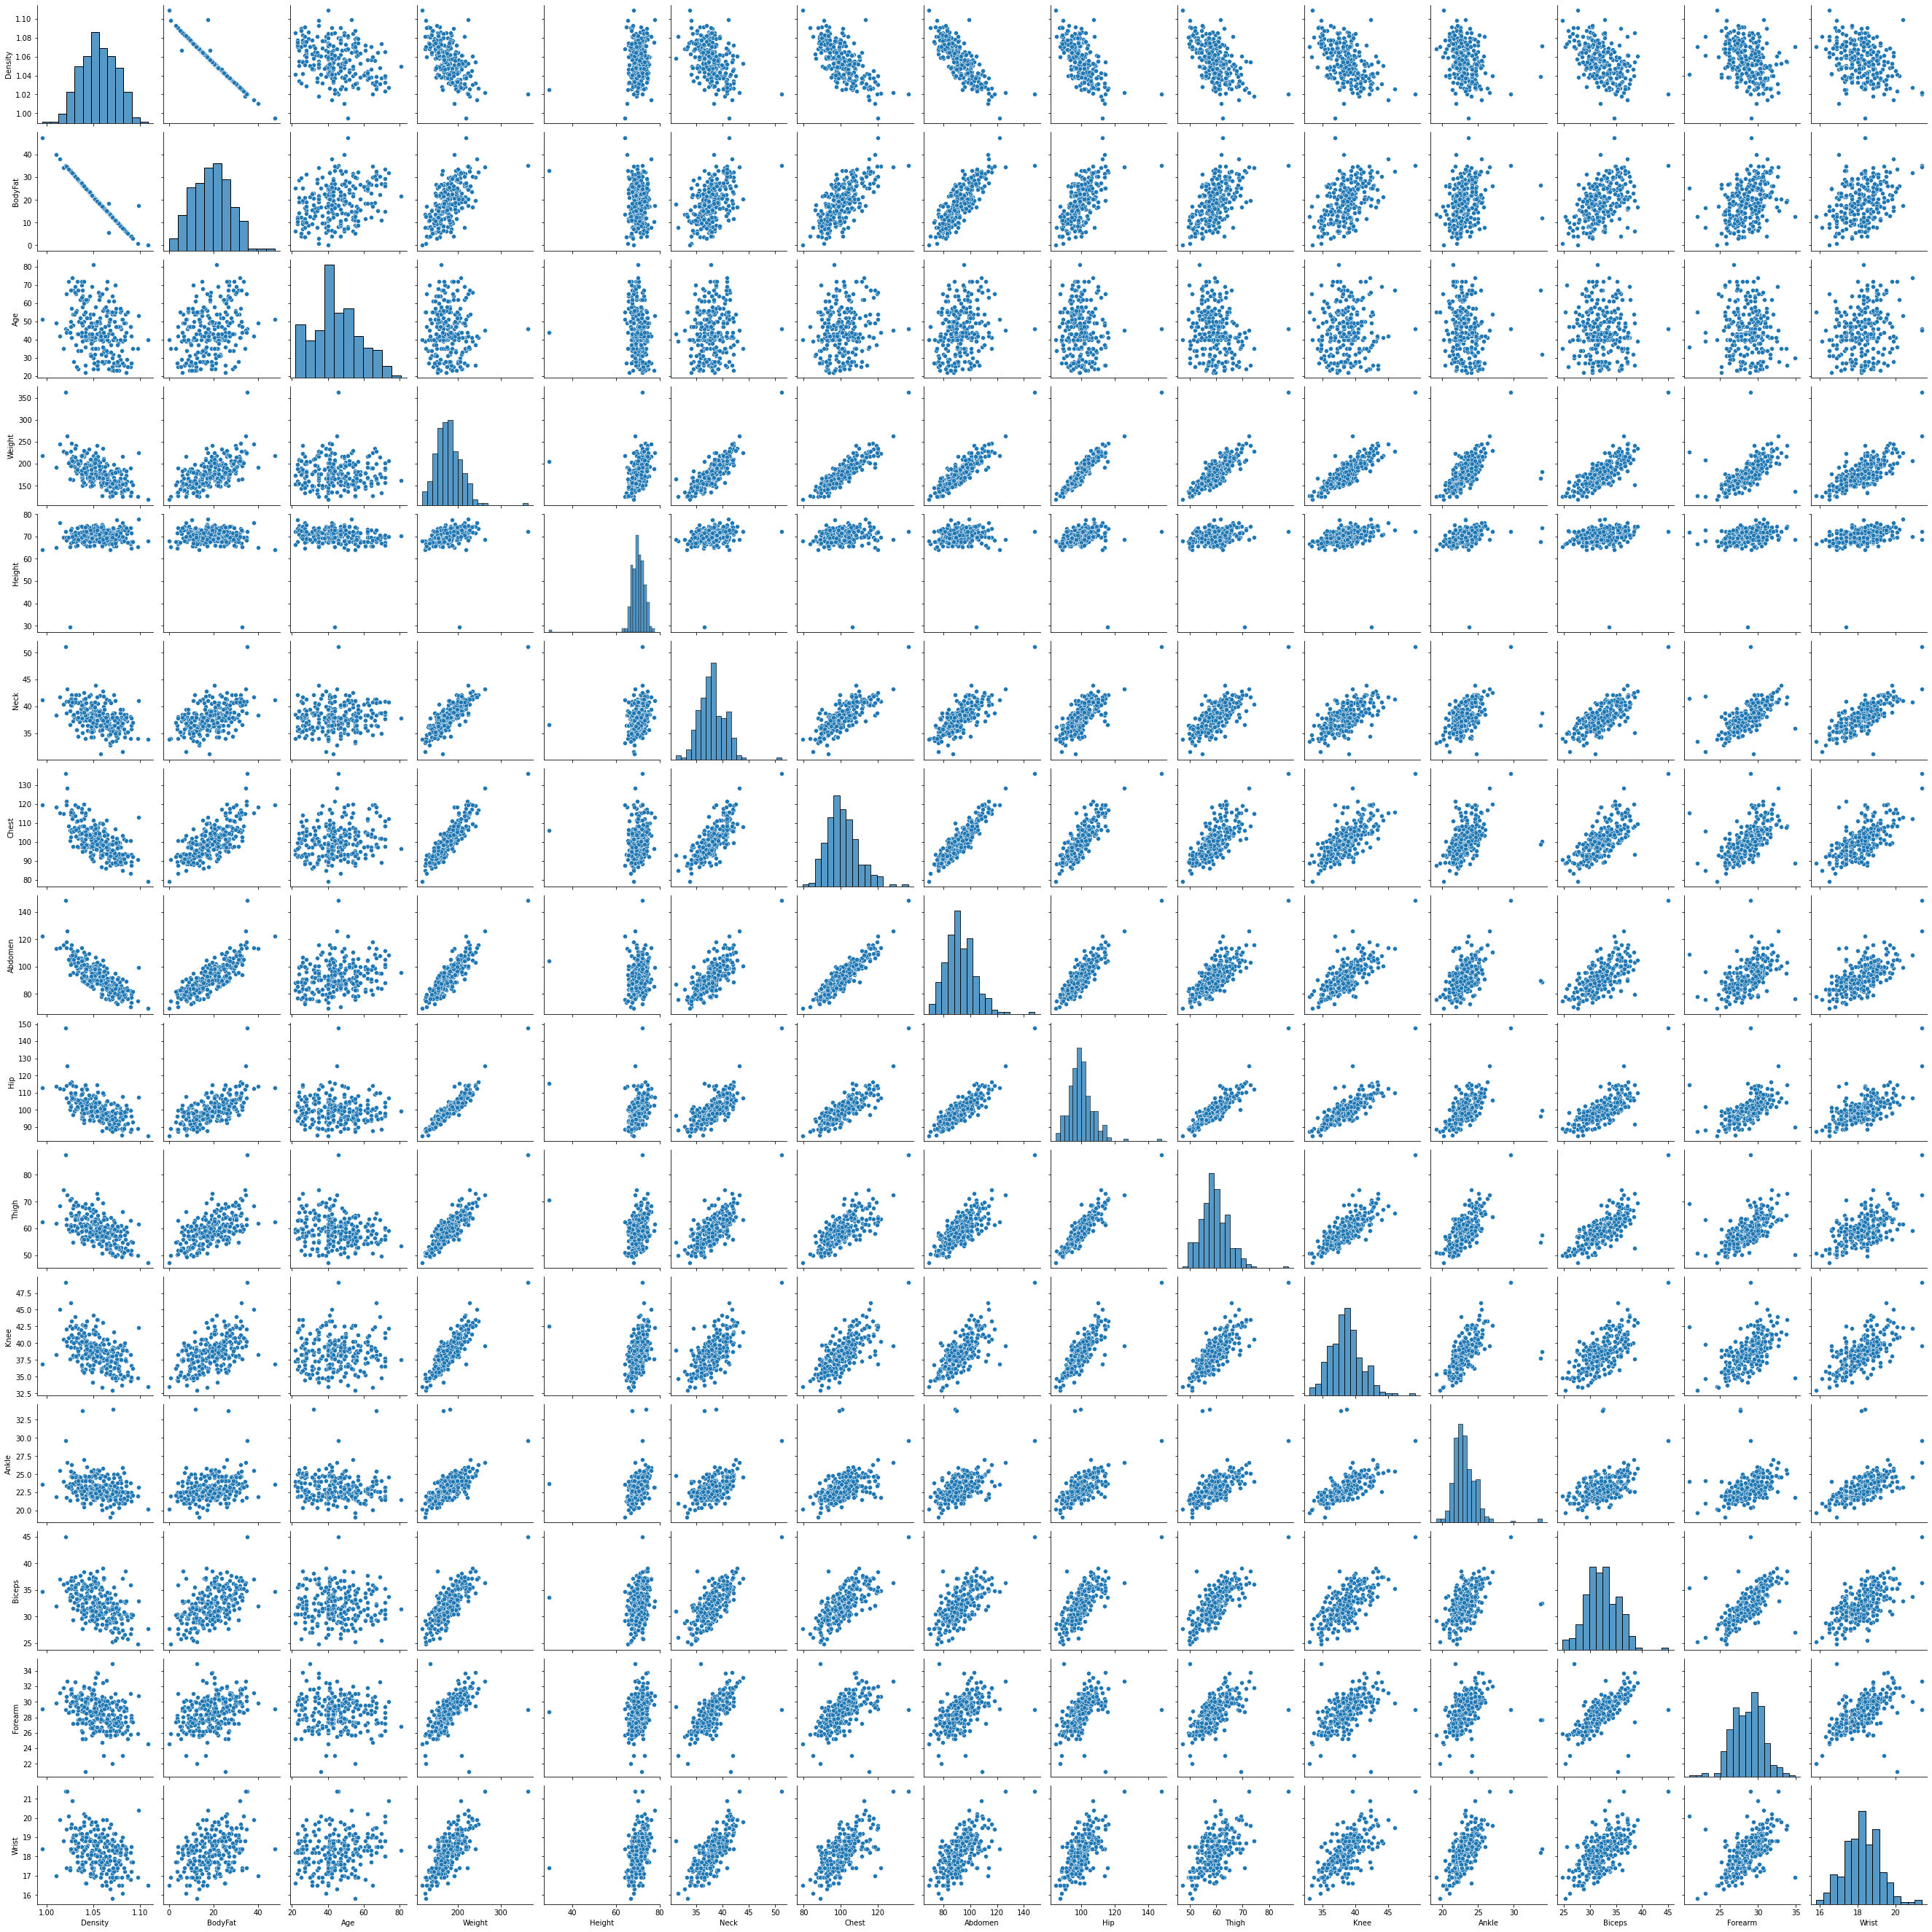

In [29]:
sns.pairplot(df)

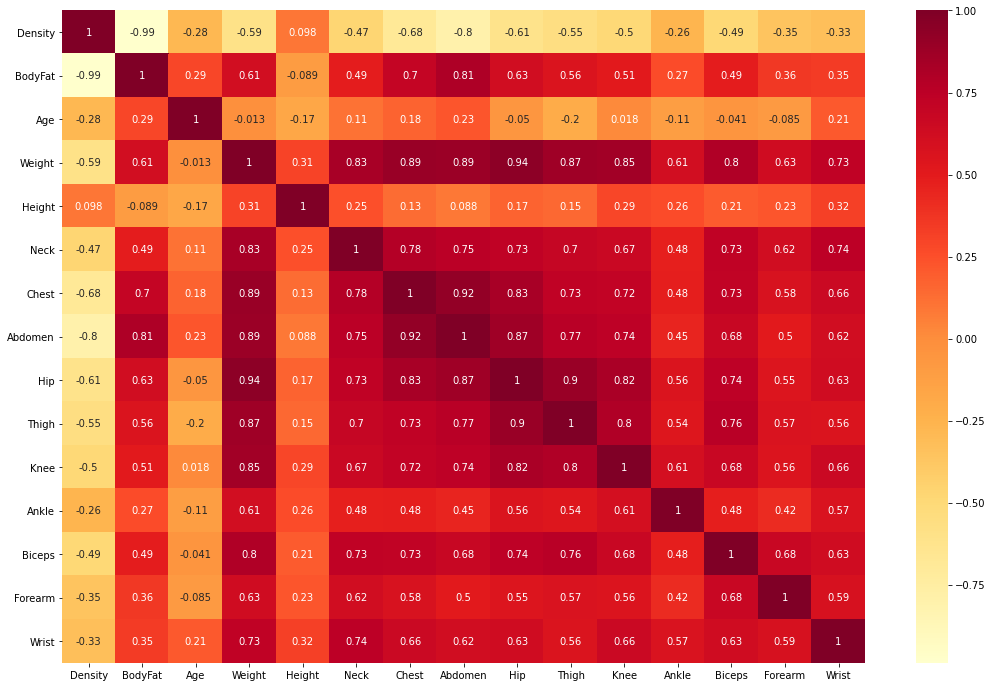

In [32]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True,cmap='YlOrRd')
plt.show()

# Splitting the Data into Dependent and Independent Variables

In [34]:
x = df.drop('BodyFat', axis=1)
y = df['BodyFat']

In [35]:
x.shape

(252, 14)

# Feature Importance

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.76192097 0.00146004 0.01420497 0.00381425 0.00290638 0.05765709
 0.12119392 0.01715149 0.00176566 0.00456457 0.0011158  0.00965492
 0.00094043 0.00164953]


In [38]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)

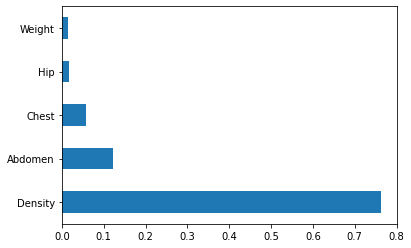

In [39]:
feat_imp.nlargest(5).plot(kind='barh')

# Training and Testing the Data

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [44]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

## Accuracy

In [45]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac1 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 99.34389985772462
Accuracy of testing data: 88.02065759522881


## Error

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 0.6257204718534839
Mean Squared Error: 6.528576727686767
Root Mean Squared Error: 2.555107967911878


# Decission Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Prediction

In [71]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Accuracy

In [72]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac2 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 96.7030531456007
Accuracy of testing data: 89.27056053767987


## Error

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 1.528902284888569
Mean Squared Error: 5.847396827636233
Root Mean Squared Error: 2.418139124954607


# Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3)
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Prediction

In [105]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Accuracy

In [106]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac3 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 98.38209292469364
Accuracy of testing data: 91.72551266711207


## Error

In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 0.9748653606702645
Mean Squared Error: 4.509481706901999
Root Mean Squared Error: 2.1235540273094062


# Comparing Accuracy

In [108]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'Decission Tree', ac3:'Random Forest'}

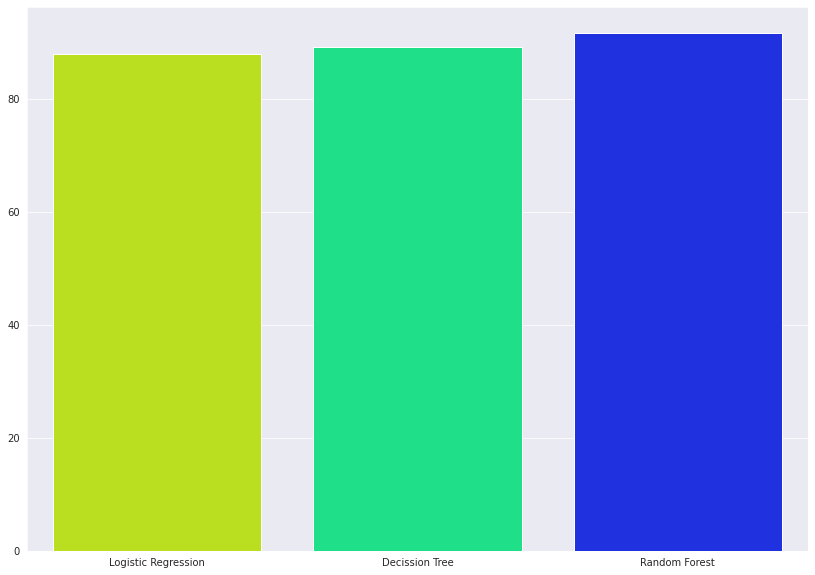

In [114]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow')

As accuracy of **Random Forest Regressor** algorithm is more ie. **91.72%** ~ **92%**

Hence we will save the model.

# Saving the model

In [115]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

# Sample Prediction

In [120]:
p = model.predict([[1.0751,	26,	184.75,	72.25,	37.4,	101.8,	86.4,	101.2,	60.1,	37.3,	22.8,	32.4,	29.4,	18.2]])
print("Body Fat = ", p)

Body Fat =  [10.4]
